# 1. Contextualização

## 1.1. Metas e objetivos 

## 1.2. Estrutura do dataset

# 2. Preparação do ambiente
## 2.1. Importação das bibliotecas e carregamento dos dados

In [2]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Análise Exploratória de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning 
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# Pré-processamento
from scipy.stats import zscore
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Configurações do notebook
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set_palette('Dark2')
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 40)

In [3]:
df = pd.read_csv("../data/raw/bank-full.csv", sep = ';')

## 2.2. Revisando os dados

In [4]:
print(f"Dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

Dataset possui 45211 linhas e 17 colunas.


In [5]:
print(f"O dataset possui: {len(df.select_dtypes(include = 'object').columns.to_list())} colunas categóricas.")
print(f"O dataset possui: {len(df.select_dtypes(include = 'number').columns.to_list())} colunas numéricas.")

O dataset possui: 10 colunas categóricas.
O dataset possui: 7 colunas numéricas.


In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

- Será necessário LabelEncoding para a variável target (y);
- O dataset não apresenta dados nulos;
- Os dtype estão corretos;

# 3. Análise Exploratória de Dados (EDA)

## 3.1. Estatísticas descritivas

In [9]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.94,10.62,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.27,3044.77,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.81,8.32,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.16,257.53,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.76,3.10,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.20,100.13,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.58,2.30,0.0,0.0,0.0,0.0,275.0


In [10]:
df.select_dtypes(include = 'object').describe().T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


## 3.2. Análises univariadas

### Idade

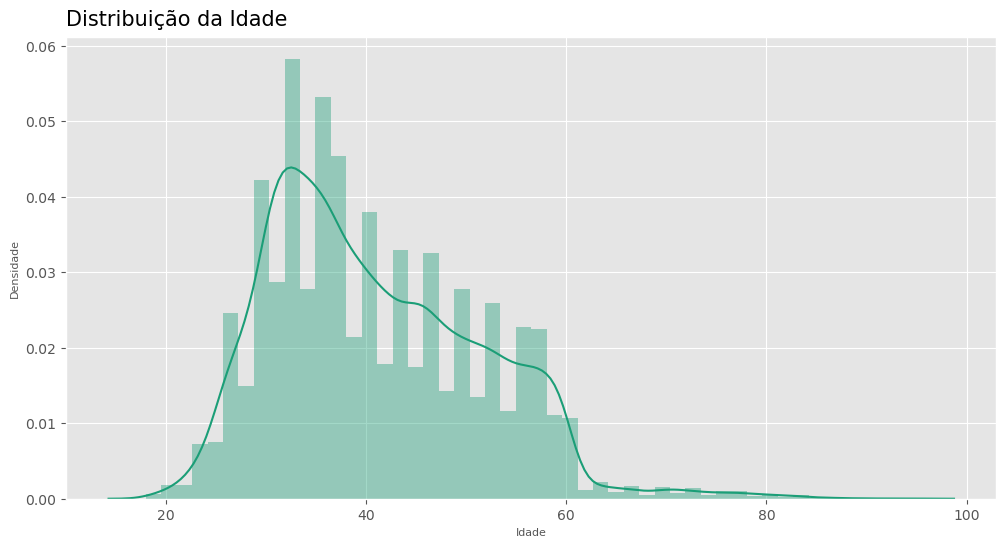

In [11]:
fig, ax = plt.subplots(figsize = (12,6))

sns.distplot(df.age)
ax.set_title("Distribuição da Idade", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("Idade", fontsize = 8)
ax.set_ylabel("Densidade", fontsize = 8)
plt.show()

In [12]:
print(f"A idade média dos clientes é de: {df['age'].mean()}")
print(f"A idade mediana dos clientes é de: {df['age'].median()}")
print(f"O desvio padrão da idade média clientes é de: {df['age'].std()}")

A idade média dos clientes é de: 40.93621021432837
A idade mediana dos clientes é de: 39.0
O desvio padrão da idade média clientes é de: 10.618762040975431


Existe um assimetria na distribuição da idade causada pela quantidade de clientes na terceira idade.

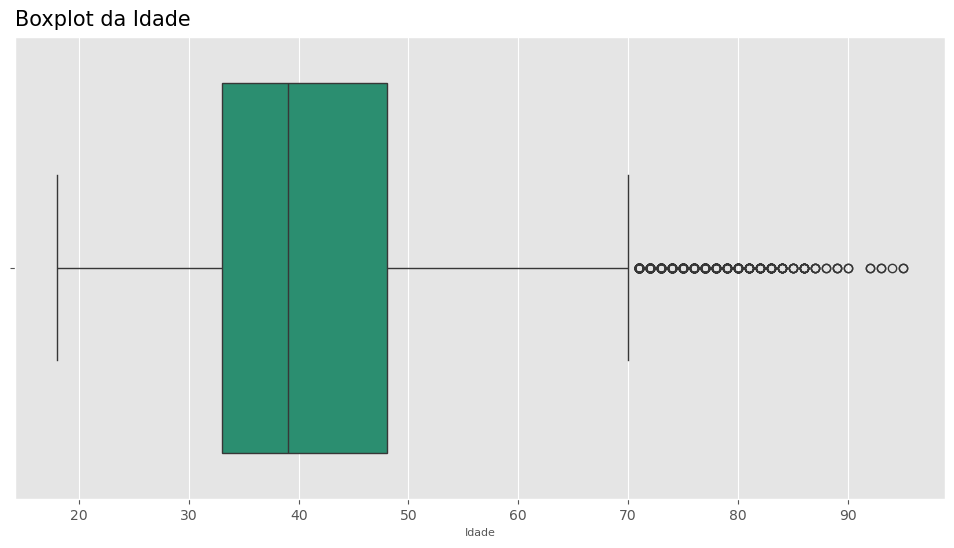

In [13]:
fig, ax = plt.subplots(figsize = (12,6))

sns.boxplot(df.age, orient = 'h')
ax.set_title("Boxplot da Idade", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("Idade", fontsize = 8)
plt.show()

In [14]:
# Vamos checar quantos clientes acima dos 70 anos temos

filtro = df[df['age'] > 70].index
idosos = df.loc[filtro, 'age'].count()

print(f"O número de clientes acima dos 60 anos é {idosos}, eles são {round(((idosos / df.shape[0]) * 100), 2)}% do total.")

O número de clientes acima dos 60 anos é 487, eles são 1.08% do total.


A maioria dos clientes estão entre o meio de seus 30 anos e fim dos 40. Existe uma quantidade relavativamente baixa de idosos em relação ao restante. 

### Emprego

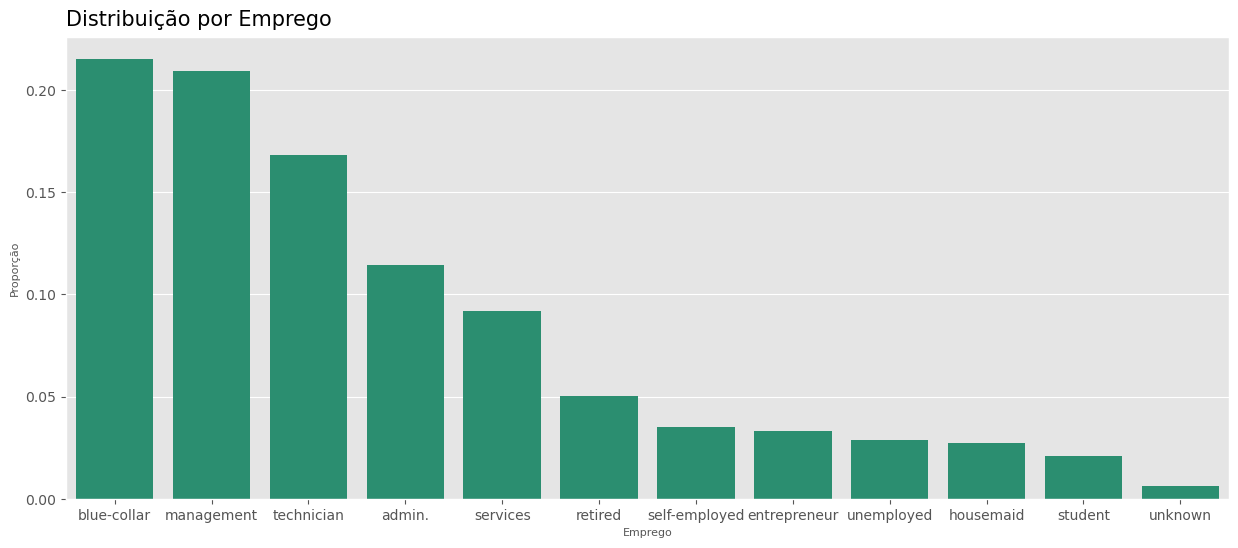

In [15]:
job_freq = df.job.value_counts(normalize = True).reset_index()

fig, ax = plt.subplots(figsize = (15, 6))
sns.barplot(job_freq, x = 'job', y = 'proportion')
ax.set_title("Distribuição por Emprego", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("Emprego", fontsize = 8)
ax.set_ylabel("Proporção", fontsize = 8)
plt.show()

No inglês "Blue-collar" se refere a empregos mais braçais, geralmente ligados a construção civil e prestação de serviços como operadores de máquinas, caminhoneiros, eletricistas e etc. Estes profissionais mais de 20% dos clientes do banco, seguidos por pessoas em cargos de gerência e técnicos. 

### Estado civil

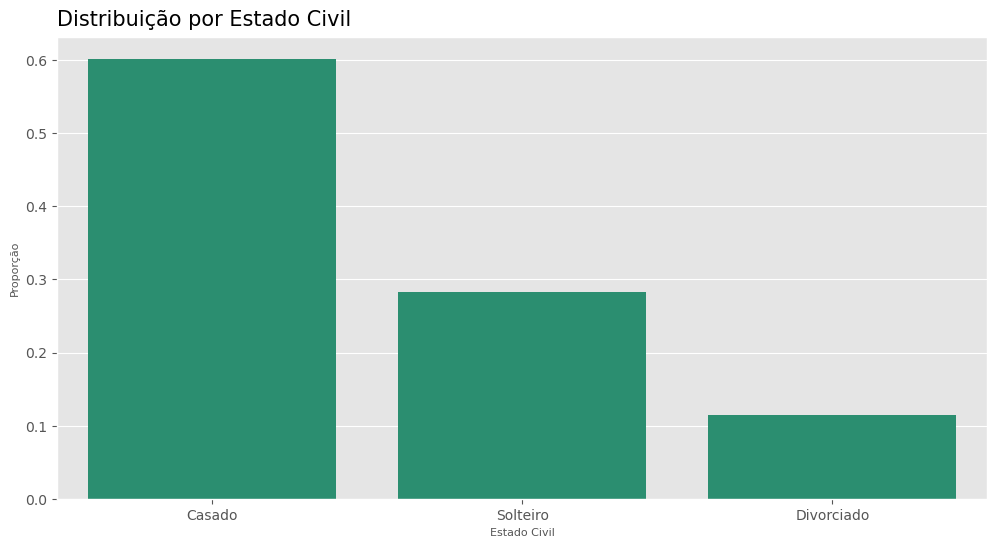

In [16]:
marital_freq = df.marital.value_counts(normalize = True).reset_index()

fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(marital_freq, x = 'marital', y = 'proportion')
ax.set_title("Distribuição por Estado Civil", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("Estado Civil", fontsize = 8)
ax.set_ylabel("Proporção", fontsize = 8)
ax.set_xticklabels(['Casado', 'Solteiro', 'Divorciado'])
plt.show()

### Educação

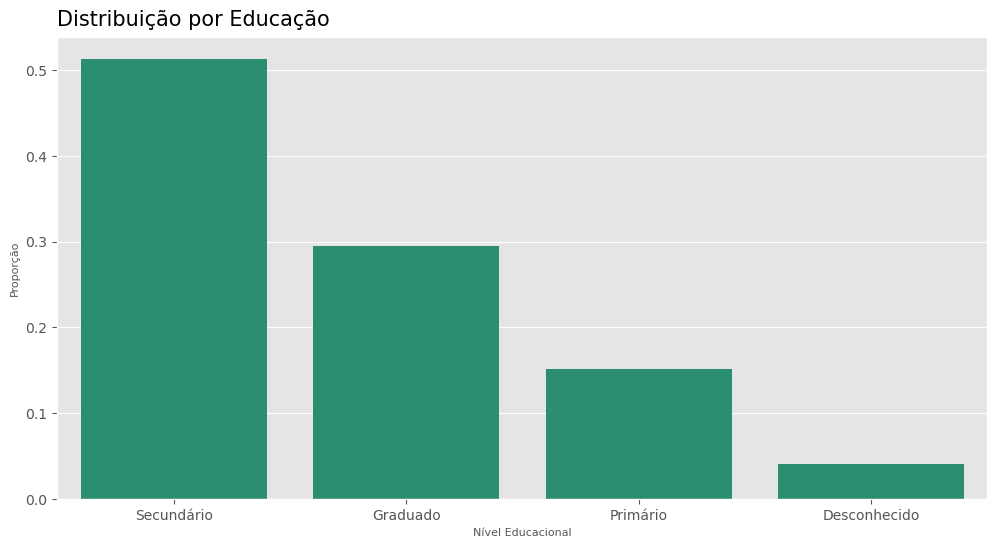

In [17]:
ed_freq = df.education.value_counts(normalize = True).reset_index()

fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(ed_freq, x = 'education', y = 'proportion')
ax.set_title("Distribuição por Educação", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("Nível Educacional", fontsize = 8)
ax.set_ylabel("Proporção", fontsize = 8)
ax.set_xticklabels(['Secundário', 'Graduado', 'Primário', 'Desconhecido'])
plt.show()

Quase 70% dos clientes do banco não possuem uma graduação, o que se reflete na alta quantidade de prestadores de serviços e técnicos entre eles. 

### Dívidas com o banco

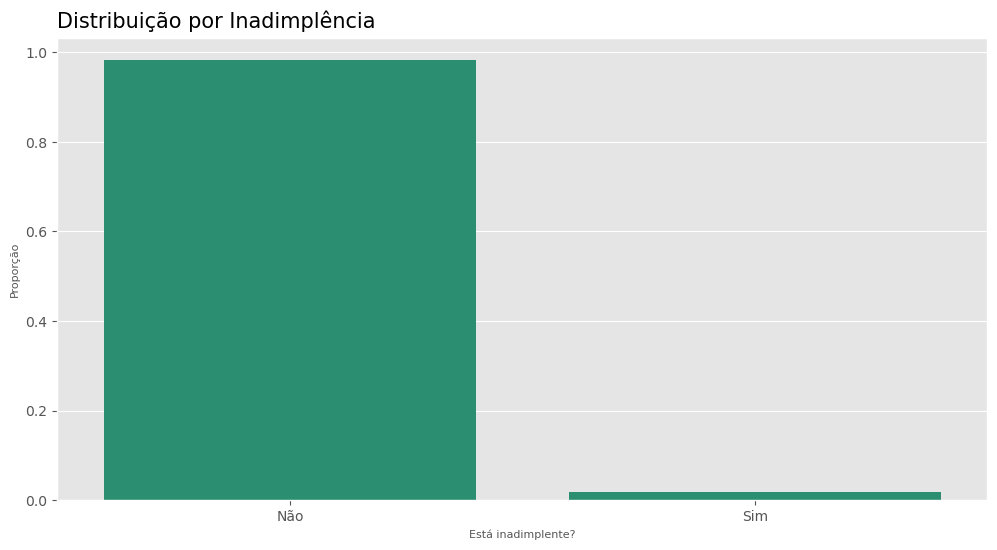

In [18]:
default_freq = df.default.value_counts(normalize = True).reset_index()

fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(default_freq, x = 'default', y = 'proportion')
ax.set_title("Distribuição por Inadimplência", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("Está inadimplente?", fontsize = 8)
ax.set_ylabel("Proporção", fontsize = 8)
ax.set_xticklabels(['Não', 'Sim'])
plt.show()

### Balanço anual

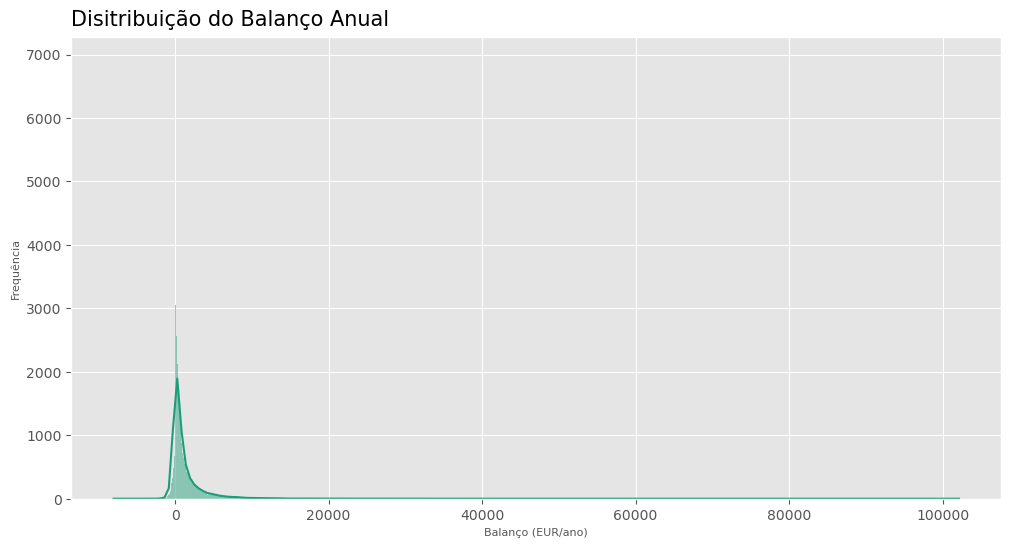

In [19]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.histplot(df.balance, kde = True)
ax.set_title("Disitribuição do Balanço Anual", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("Balanço (EUR/ano)", fontsize = 8)
ax.set_ylabel("Frequência", fontsize = 8)
plt.show()

Naturalmente por se tratarem de dados bancários, a desigualdade economica vai se mostrar nesta variável. Acredito na necessidade de remoção dos outliers antes do treinamento do modelo de Machine Learning.

### Possui financiamento imobiliário?

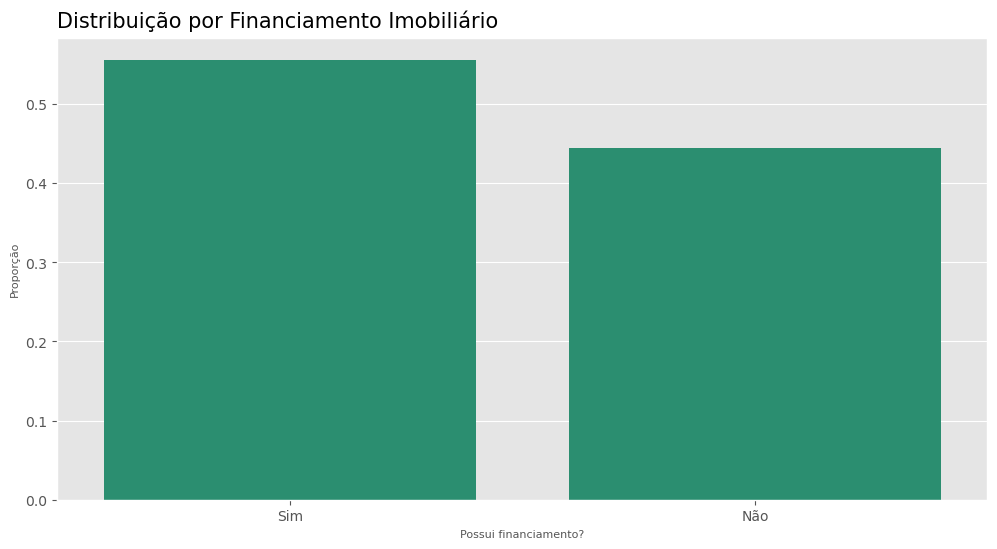

In [20]:
housing_freq = df.housing.value_counts(normalize = True).reset_index()

fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(housing_freq, x = 'housing', y = 'proportion')
ax.set_title('Distribuição por Financiamento Imobiliário', fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel('Possui financiamento?', fontsize = 8)
ax.set_ylabel('Proporção', fontsize = 8)
ax.set_xticklabels(['Sim', 'Não'])
plt.show()

### Empréstimos

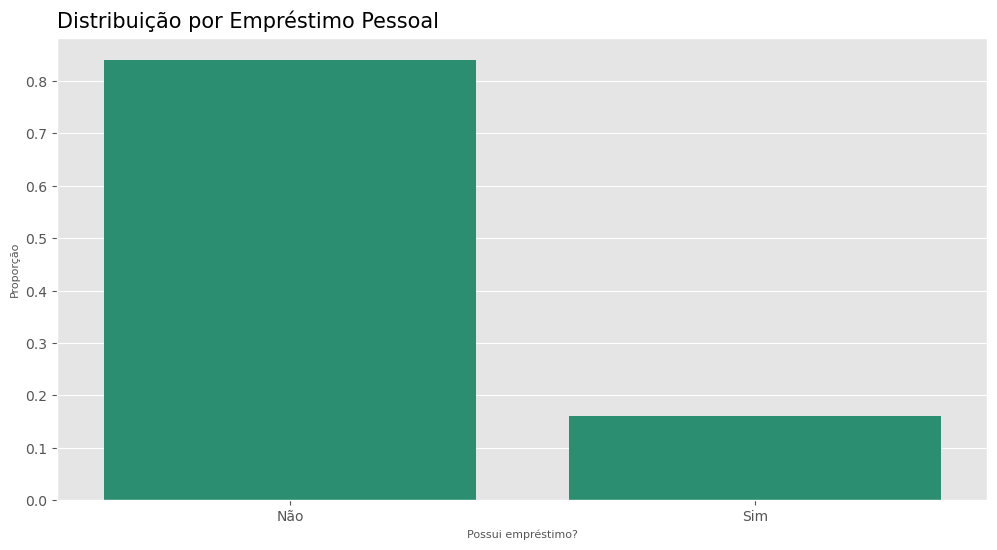

In [21]:
loan_freq = df.loan.value_counts(normalize=True).reset_index()

fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(loan_freq, x = 'loan', y = 'proportion')
ax.set_title('Distribuição por Empréstimo Pessoal', fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel('Possui empréstimo?', fontsize = 8)
ax.set_ylabel('Proporção', fontsize = 8)
ax.set_xticklabels(['Não', 'Sim'])
plt.show()

### Meio de contato

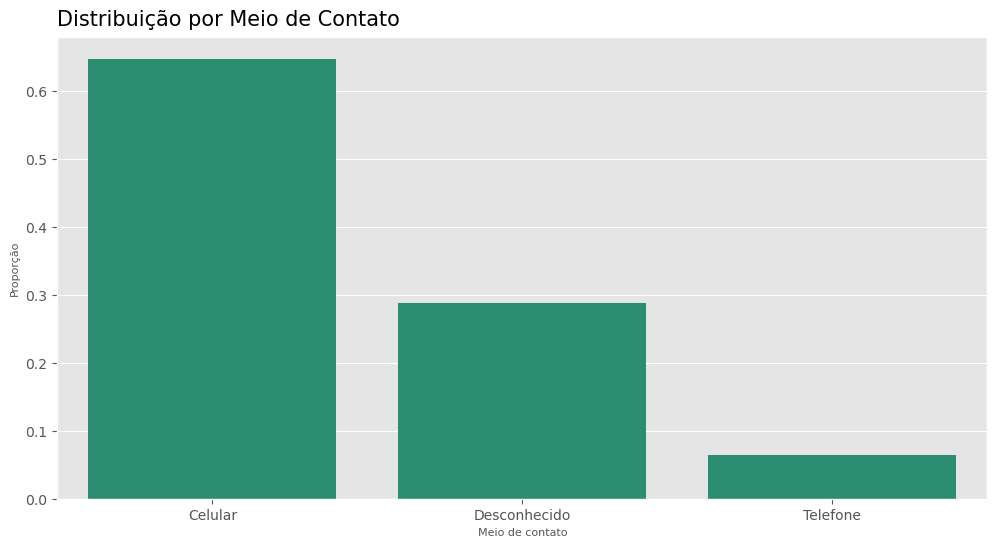

In [22]:
cont_freq = df.contact.value_counts(normalize = True).reset_index()

fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(cont_freq, x = 'contact', y = 'proportion')
ax.set_title('Distribuição por Meio de Contato', fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel('Meio de contato', fontsize = 8)
ax.set_ylabel('Proporção', fontsize = 8)
ax.set_xticklabels(['Celular', 'Desconhecido', 'Telefone'])
plt.show()

### Mês de contato

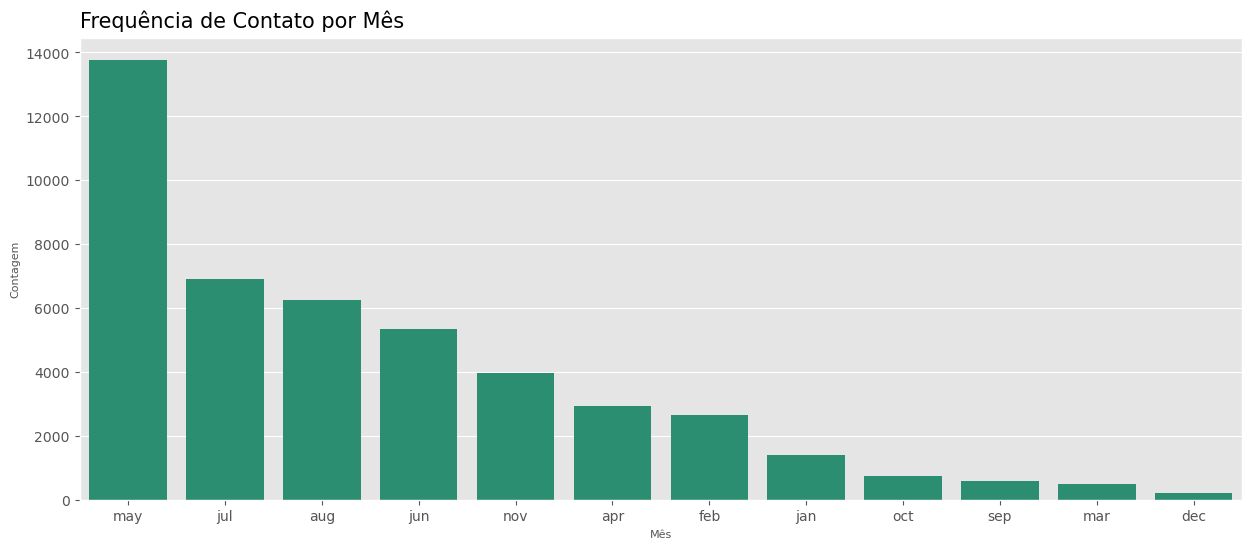

In [23]:
freq_month = df.month.value_counts().reset_index()

fig, ax = plt.subplots(figsize = (15, 6))
sns.barplot(freq_month, x = 'month', y = 'count')
ax.set_title('Frequência de Contato por Mês', fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel('Mês', fontsize = 8)
ax.set_ylabel('Contagem', fontsize = 8)
plt.show()

O volume de contatos se acumula entre o fim do segundo trimestre o começo do segundo, sendo maio o mês com maior quantidade de contatos.

### Duração das ligações

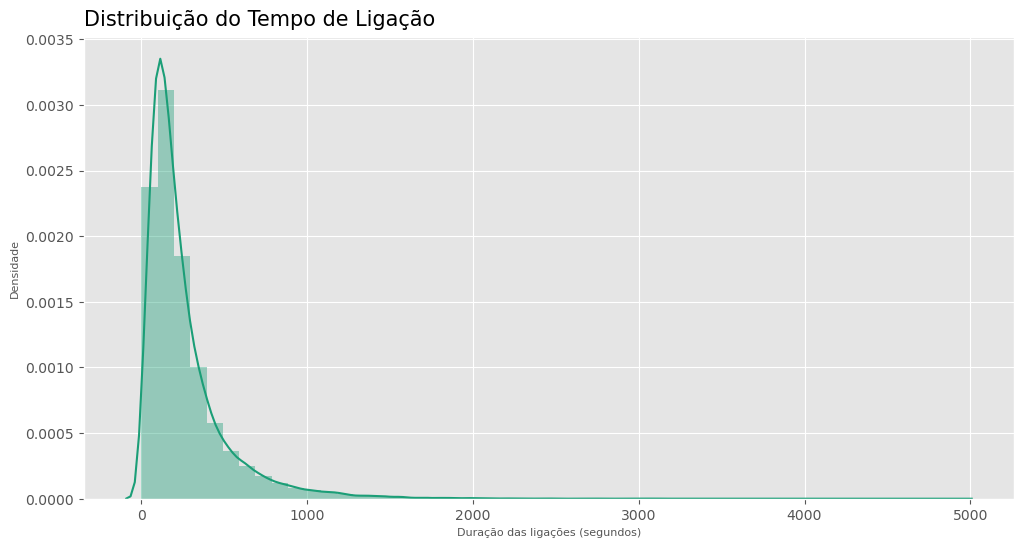

In [24]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.distplot(df.duration)
ax.set_title("Distribuição do Tempo de Ligação", fontsize=15, pad=8, loc='left')
ax.set_xlabel("Duração das ligações (segundos)", fontsize = 8)
ax.set_ylabel("Densidade", fontsize = 8)
plt.show()

In [25]:
print(f"A duração média das ligações é: {df.duration.mean()}")
print(f"A mediana da duração das ligações é: {df.duration.median()}")
print(f"O desvio padrão da duração das ligações é: {df.duration.std()}")

A duração média das ligações é: 258.1630797814691
A mediana da duração das ligações é: 180.0
O desvio padrão da duração das ligações é: 257.52781226517095


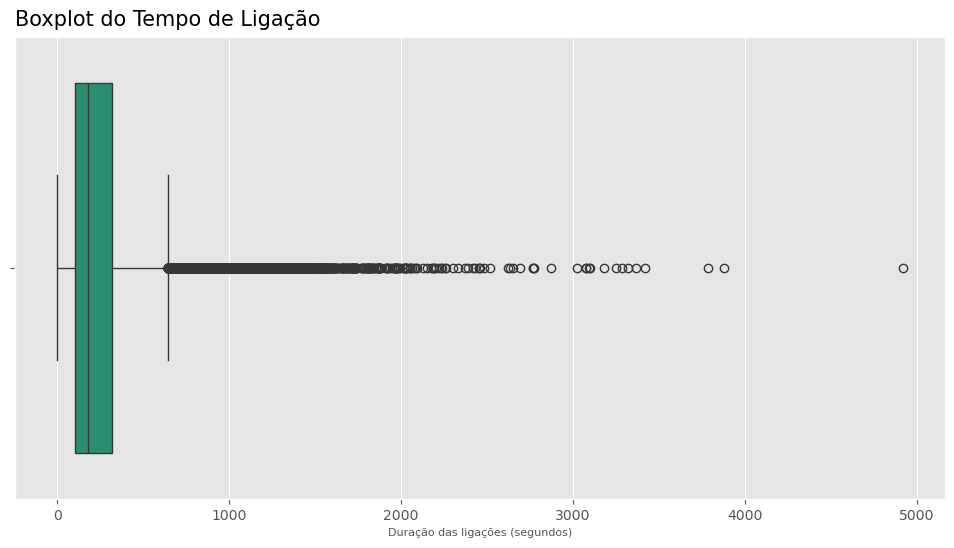

In [26]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.boxplot(df.duration, orient = 'h')
ax.set_title("Boxplot do Tempo de Ligação", fontsize=15, pad=8, loc='left')
ax.set_xlabel("Duração das ligações (segundos)", fontsize = 8)
plt.show()

Existe uma alta quantidade de outliers nas ligações, outra variável que precisa de uma limpeza prévia, uma ligação de 1000 segundos tem aproximadamente 16 minutos é um tempo longo de ligação. Em breve vamos ver a relação entre o tempo de ligação e o sucesso na assintura do *term deposit*.

### Contatos durante a campanha

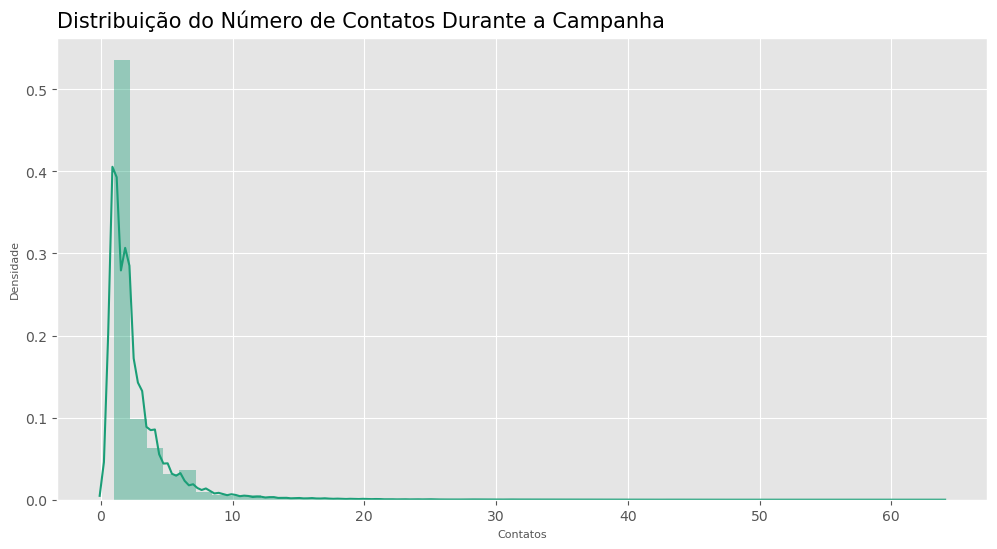

In [27]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.distplot(df.campaign)
ax.set_title("Distribuição do Número de Contatos Durante a Campanha", fontsize=15, pad=8, loc='left')
ax.set_xlabel("Contatos", fontsize = 8)
ax.set_ylabel("Densidade", fontsize = 8)
plt.show()

In [28]:
print(f"Média de ligação durante a campanha: {df.campaign.mean()}")
print(f"Mediana de ligações durante a campanha: {df.campaign.median()}")
print(f"Desvio padrão do número de ligações: {df.campaign.std()}")

Média de ligação durante a campanha: 2.763840658246887
Mediana de ligações durante a campanha: 2.0
Desvio padrão do número de ligações: 3.0980208832802205


Essa é outra variável que sofre com outliers, e é um ponto de alerta, um cliente que recebe mais de 50 ligações sobre uma campanha pode se tornar alguém em ponto de churn ou um processo legal contra instituição. 

### Dias entre contato sobre a última campanha e a atual

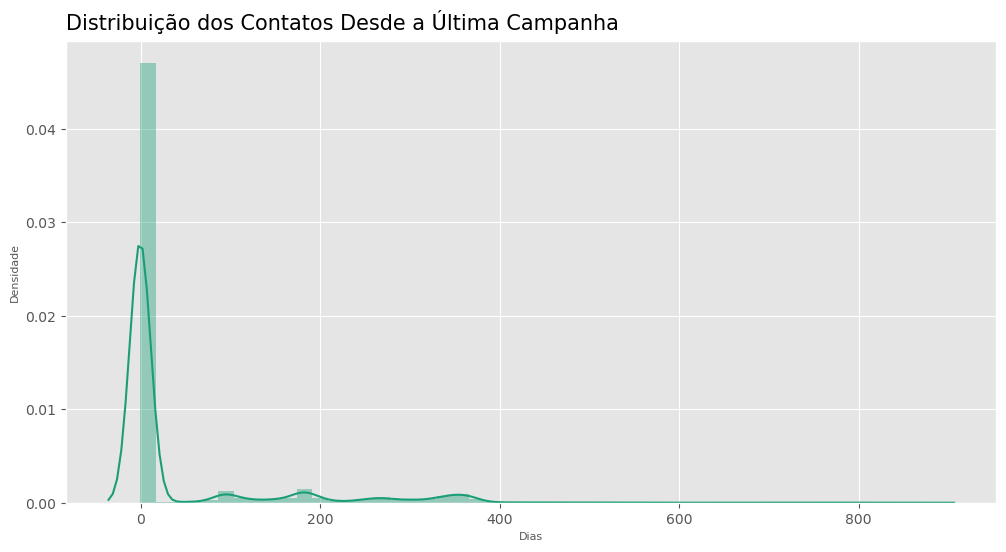

In [29]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.distplot(df.pdays)
ax.set_title("Distribuição dos Contatos Desde a Última Campanha", fontsize=15, pad=8, loc='left')
ax.set_xlabel("Dias", fontsize = 8)
ax.set_ylabel("Densidade", fontsize = 8)
plt.show()


Clientes que não foram contatados na última campanha são marcados com -1. Vamos ver a proporção da base que não foi contatada. 

In [30]:
filtro = df[df['pdays'] == -1].index
prop_sem_contato =(df.loc[filtro].shape[0] / df.shape[0]) * 100
print(f"A porcentagem de clientes que não foram contatados em campanhas anteriores: {round(prop_sem_contato, 2)}%")

A porcentagem de clientes que não foram contatados em campanhas anteriores: 81.74%


Acredito que a variável de número de contatos seja mais representativa que a de número de dias. A um volume alto de clientes não contatados, vamos ver se isso se confirma na variável de número de contatos.

### Contatos antes da campanha atual

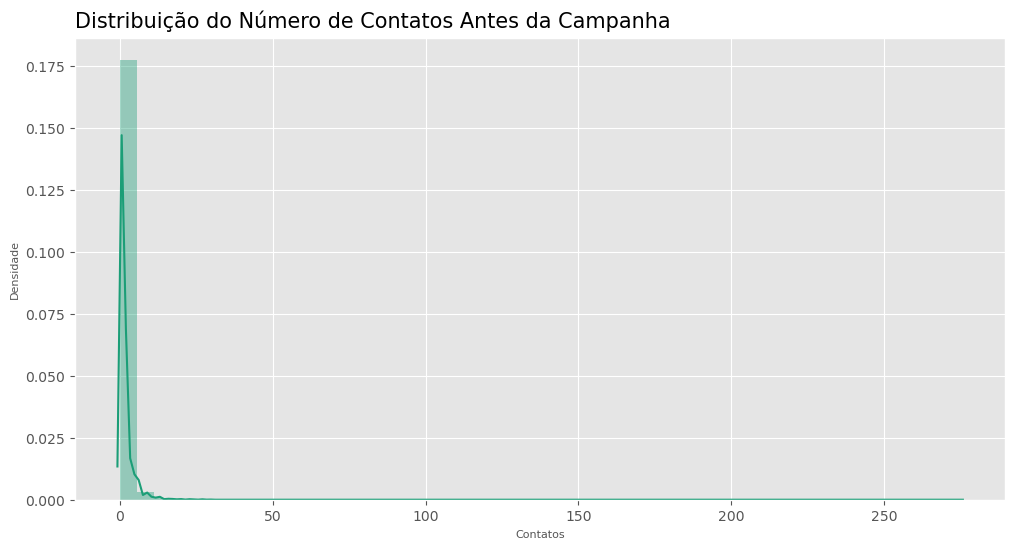

In [31]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.distplot(df.previous)
ax.set_title("Distribuição do Número de Contatos Antes da Campanha", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("Contatos", fontsize = 8)
ax.set_ylabel("Densidade", fontsize = 8)
plt.show()

In [32]:
filtro = df[df['previous'] == 0].index
prop_sem_contato =(df.loc[filtro].shape[0] / df.shape[0]) * 100
print("Considerando o número de contatos")
print(f"A porcentagem de clientes que não foram contatados em campanhas anteriores: {round(prop_sem_contato, 2)}%")

Considerando o número de contatos
A porcentagem de clientes que não foram contatados em campanhas anteriores: 81.74%


Vou preferir para o modelo de Machine Learning usar essa feature, e remover a anterior. Existe um alto volume de cliente não contatados, o que também mostra espaço de ação livre para oferta de produtos bancários. 

### Resultado em campanhas anteriores

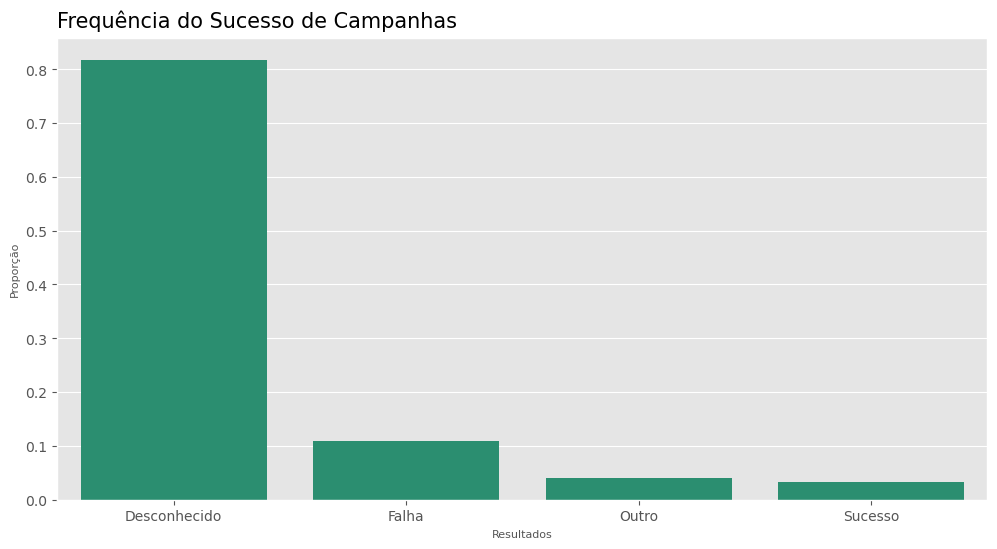

In [33]:
freq_outcome = df.poutcome.value_counts(normalize = True).reset_index()

fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(freq_outcome, x = 'poutcome', y = 'proportion')
ax.set_title("Frequência do Sucesso de Campanhas", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("Resultados", fontsize = 8)
ax.set_ylabel("Proporção", fontsize = 8)
ax.set_xticklabels(['Desconhecido', 'Falha', 'Outro', 'Sucesso'])
plt.show()

### Sucesso na campanha atual

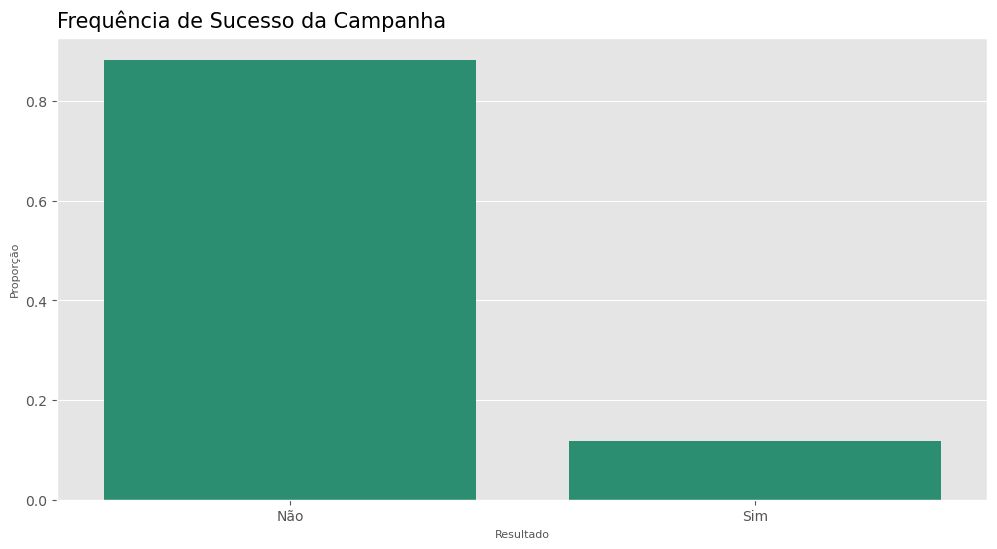

In [34]:
freq_y = df.y.value_counts(normalize = True).reset_index()

fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(freq_y, x = 'y', y = 'proportion')
ax.set_title("Frequência de Sucesso da Campanha", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("Resultado", fontsize = 8)
ax.set_ylabel("Proporção", fontsize = 8)
ax.set_xticklabels(['Não', 'Sim'])
plt.show()

A campanha tem uma taxa de sucesso de somente 11%. 

## 4.3. Análises Bivariadas

### Idade x Sucesso da Campanha

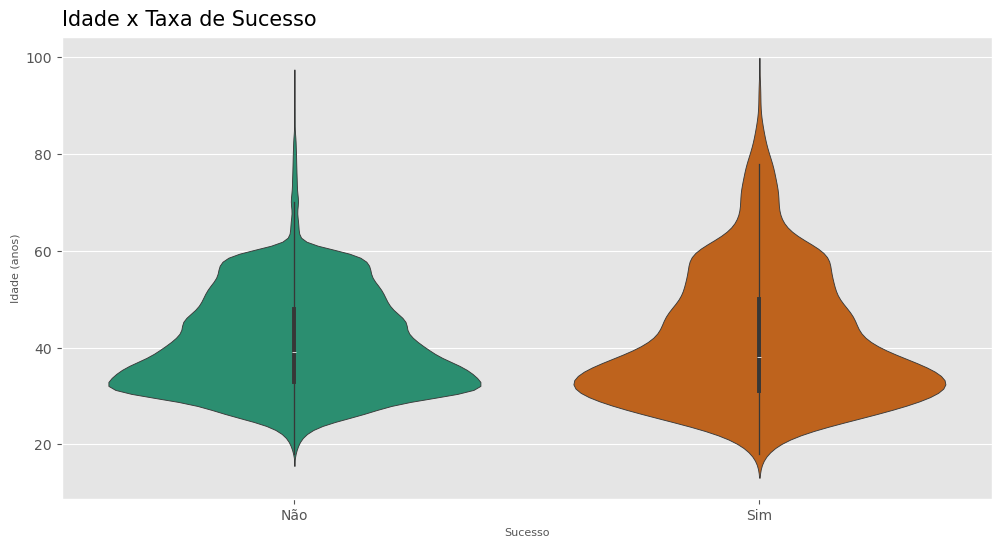

In [40]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.violinplot(x = df.y, y = df.age, hue = df.y)
ax.set_title("Idade x Taxa de Sucesso", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("Sucesso", fontsize = 8)
ax.set_ylabel("Idade (anos)", fontsize = 8)
ax.set_xticklabels(['Não', 'Sim'])
plt.show()

Existe uma maior tendência no aceite do *term deposit* em clientes mais velhos. 

### Profissão x Sucesso da Campanha

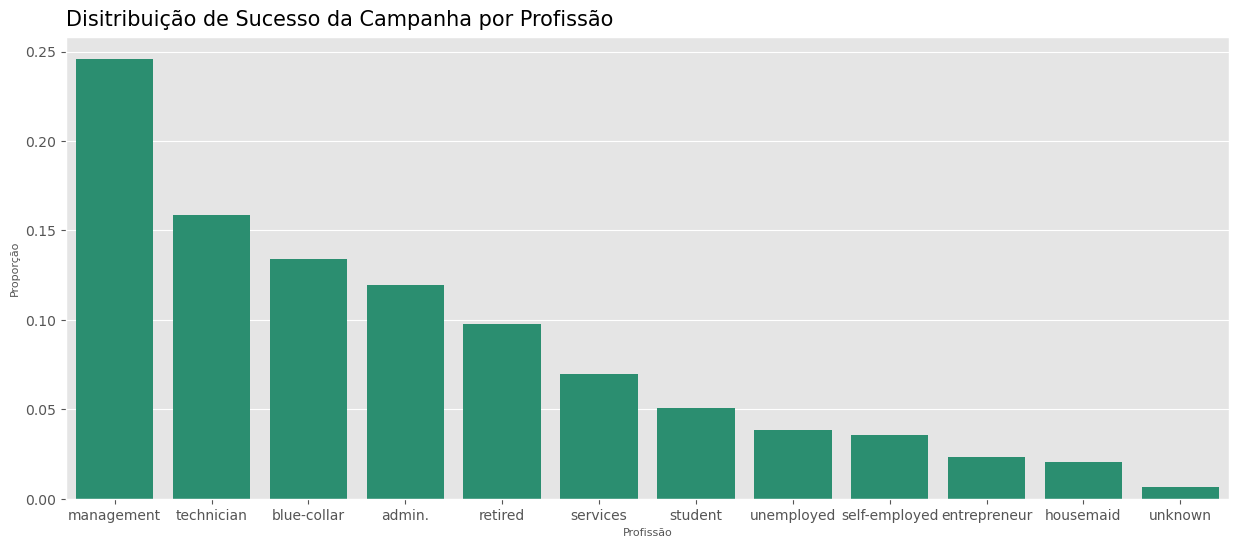

In [41]:
filtro = df[df['y'] == 'yes'].index
success_job = df.loc[filtro, 'job'].value_counts(normalize = True)

fig, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = success_job.index, y = success_job.values)
ax.set_title("Disitribuição de Sucesso da Campanha por Profissão", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("Profissão", fontsize = 8)
ax.set_ylabel("Proporção", fontsize = 8)
plt.show()

Com segundo maior número de clientes dentro do banco, pessoas em cargos de gerência tem maior sucetividade a aceitar o *term deposit*, seguidos por técnicos e prestadores de serviços. É interessante buscar estes profissionais para oferta também de outros produtos. 

### Estado Civil x Sucesso da Campanha

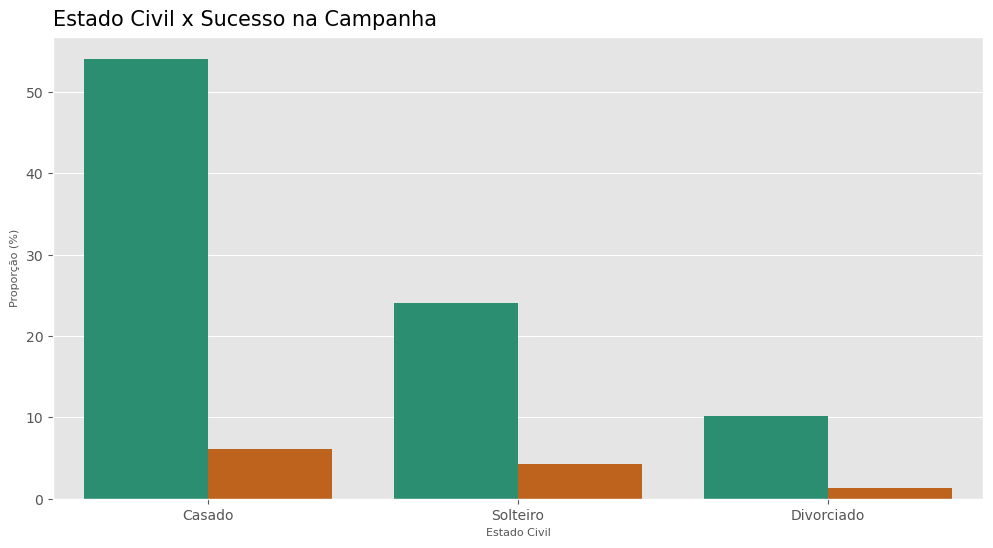

In [37]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(x = df.marital, hue = df.y, stat = 'percent')
ax.set_title("Estado Civil x Sucesso na Campanha", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("Estado Civil", fontsize = 8)
ax.set_ylabel("Proporção (%)", fontsize = 8)
ax.set_xticklabels(['Casado', 'Solteiro', 'Divorciado'])
ax.legend().remove()
plt.show()

### Nível de Educação x Sucesso da Campanha

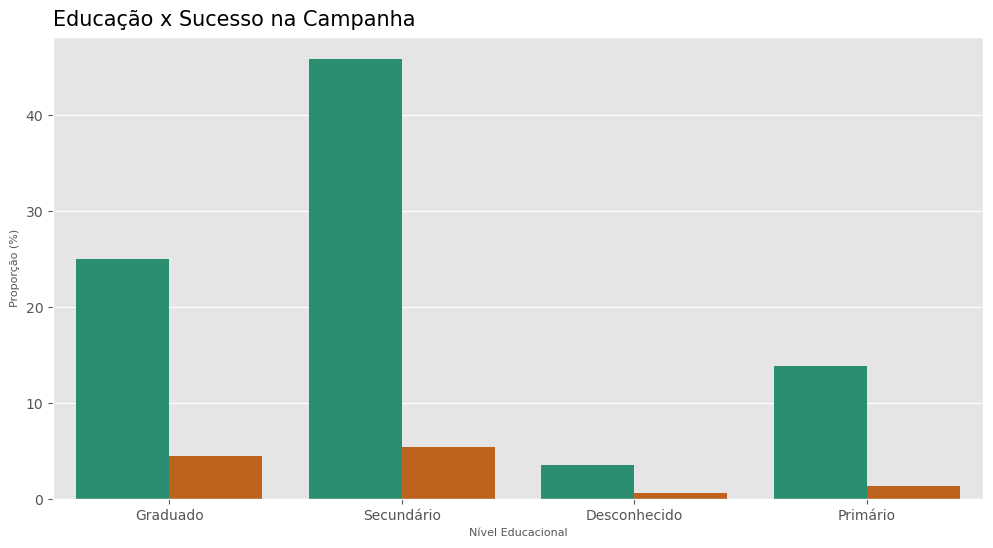

In [38]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(x = df.education, hue = df.y, stat = 'percent')
ax.set_title("Educação x Sucesso na Campanha", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("Nível Educacional", fontsize = 8)
ax.set_ylabel("Proporção (%)", fontsize = 8)
ax.set_xticklabels(['Graduado', 'Secundário', 'Desconhecido', 'Primário'])
ax.legend().remove()
plt.show()

### Balanço Anual x Sucesso da Campanha

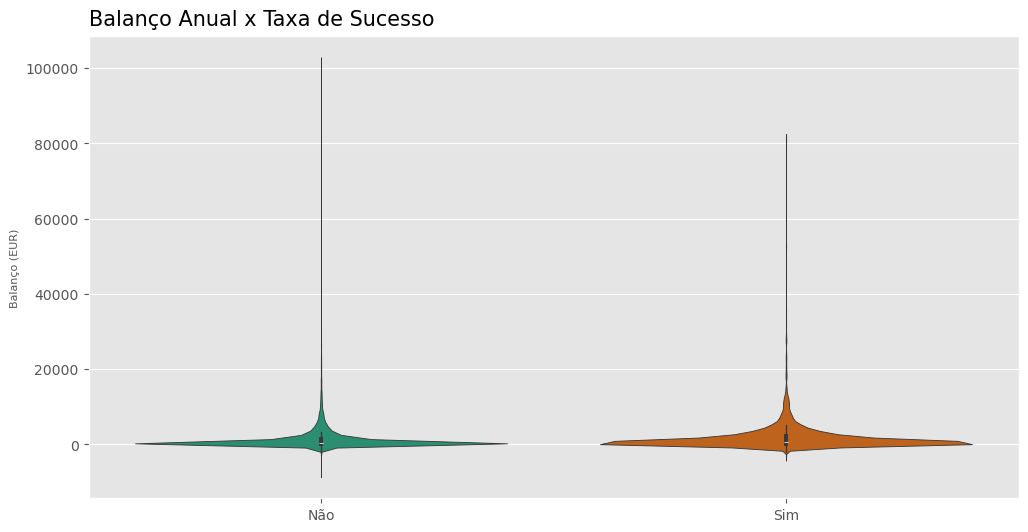

In [67]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.violinplot(x = df.y, y = df.balance, hue = df.y)
ax.set_title("Balanço Anual x Taxa de Sucesso", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("")
ax.set_ylabel("Balanço (EUR)", fontsize = 8)
ax.set_xticklabels(['Não', 'Sim'])
plt.show()

Vamos realizar a remoção dos outliers para checar a distribuição. 

In [51]:
df_clean = df.copy()
z_scores_balance = np.abs(zscore(df[['balance']]))
df_clean = df[(z_scores_balance < 3).all(axis = 1)]
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


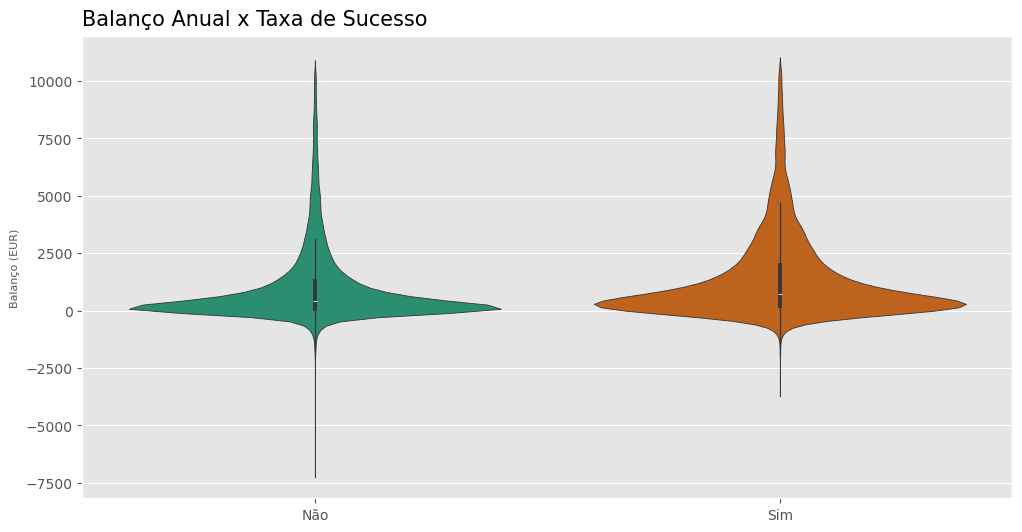

In [66]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.violinplot(x = df_clean.y, y = df_clean.balance, hue = df_clean.y)
ax.set_title("Balanço Anual x Taxa de Sucesso", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("")
ax.set_ylabel("Balanço (EUR)", fontsize = 8)
ax.set_xticklabels(['Não', 'Sim'])
plt.show()

Existe uma baixa relação entre o balanço anual em conta e o aceite do *term deposit*. Existe um alto número de pessoas com um saldo negativo ou zerado, vamos visualizar essa tendência de aceitação em pessoas que tem uma saldo anual de pelo menos 6650,04 EUR que seria o total de 12 meses do salário mínimo português no ano de coleta dos dados (554,17 EUR).

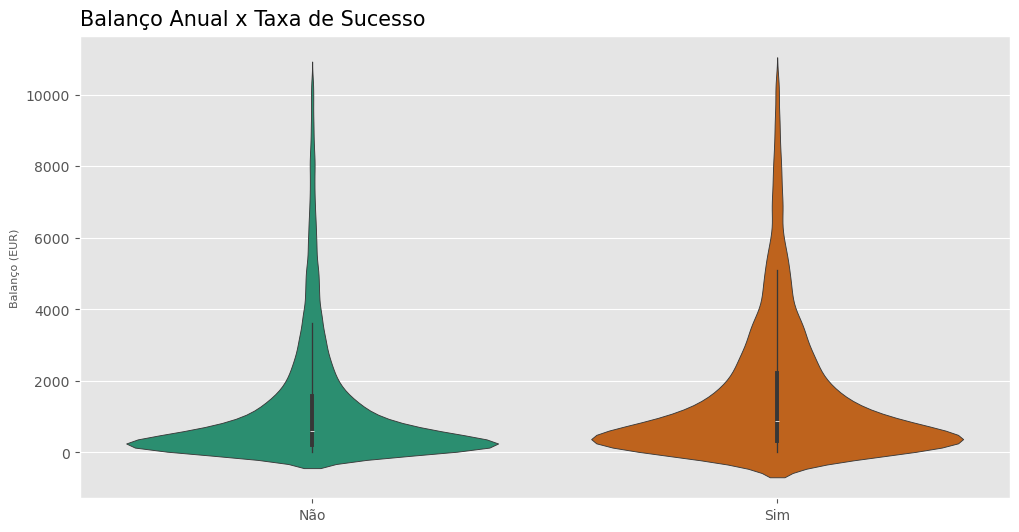

In [65]:
filtro = df_clean[df_clean.balance > 0].index
renda = df_clean.loc[filtro].copy()

fig, ax = plt.subplots(figsize = (12, 6))

sns.violinplot(x = renda.y, y = renda.balance, hue = renda.y)
ax.set_title("Balanço Anual x Taxa de Sucesso", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("")
ax.set_ylabel("Balanço (EUR)", fontsize = 8)
ax.set_xticklabels(['Não', 'Sim'])
plt.show()

Assim podemos confirmar a baixa relação entre balanço anual, e o sucesso da campanha.

### Meio de Contato x Sucesso da Campanha

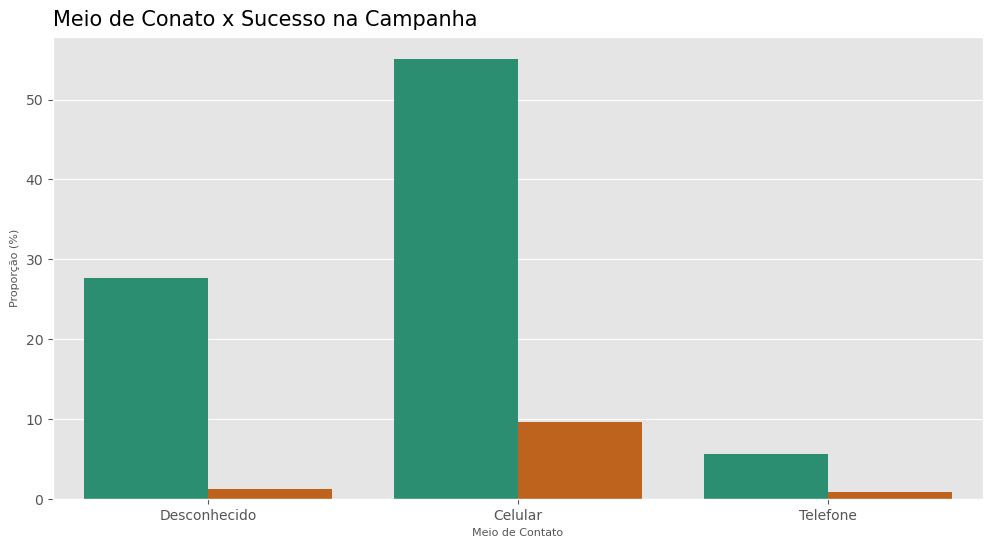

In [60]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(x = df.contact, hue = df.y, stat = 'percent')
ax.set_title("Meio de Conato x Sucesso na Campanha", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("Meio de Contato", fontsize = 8)
ax.set_ylabel("Proporção (%)", fontsize = 8)
ax.set_xticklabels(['Desconhecido', 'Celular', 'Telefone'])
ax.legend().remove()
plt.show()

### Mês x Sucesso da Campanha

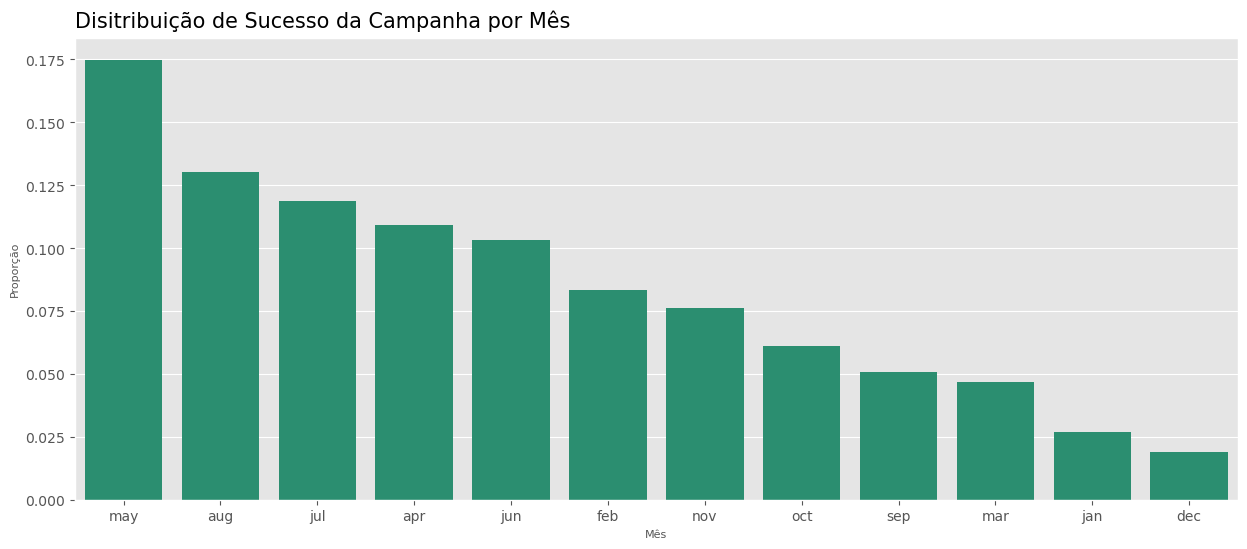

In [63]:
filtro = df[df['y'] == 'yes'].index
success_month = df.loc[filtro, 'month'].value_counts(normalize = True)

fig, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = success_month.index, y = success_month.values)
ax.set_title("Disitribuição de Sucesso da Campanha por Mês", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("Mês", fontsize = 8)
ax.set_ylabel("Proporção", fontsize = 8)
plt.show()

O segundo e o terceiro semestre são os períodos de maior sucesso nas campanhas, e podem ser trabalhadas campanhas com um orçamento maior nestes meses. Em especial Maio-Abril e Julho-Agosto. 

### Duração das Ligações x Sucesso da Campanha

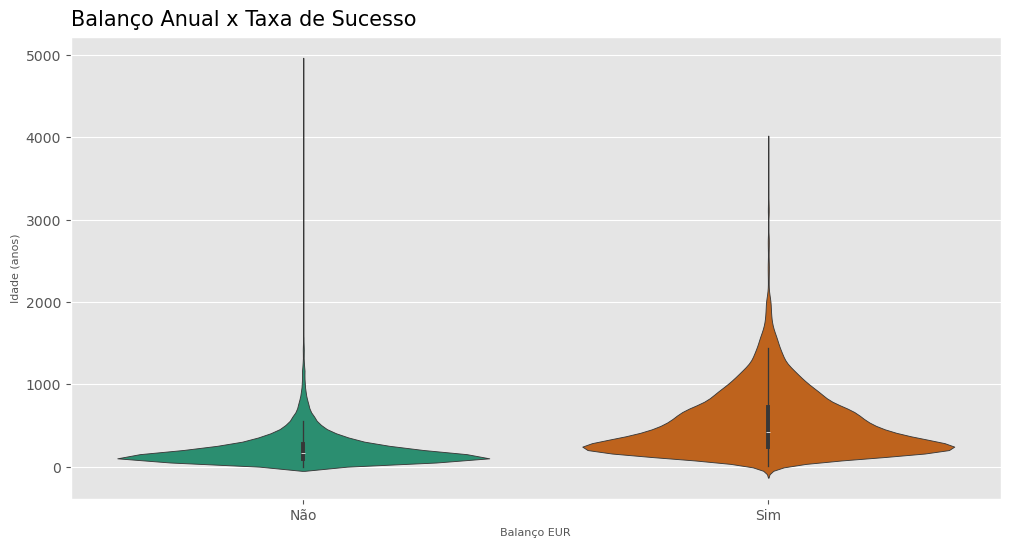

In [68]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.violinplot(x = df.y, y = df.duration, hue = df.y)
ax.set_title("Balanço Anual x Taxa de Sucesso", fontsize = 15, pad = 8, loc = 'left')
ax.set_xlabel("Balanço EUR", fontsize = 8)
ax.set_ylabel("Idade (anos)", fontsize = 8)
ax.set_xticklabels(['Não', 'Sim'])
plt.show()

Ligações mais longas tem maior chance de sucesso, mas o quão longas?

In [70]:
# Primeiro vou remover outliers

df_clean = df.copy()
z_scores_balance = np.abs(zscore(df[['duration']]))
df_clean = df[(z_scores_balance < 3).all(axis = 1)]

In [77]:
filtro = df_clean[df_clean['y'] == 'yes'].index
duration = df_clean.loc[filtro, 'duration']

print(f"A duração média de uma ligação com sucesso: {round((duration.mean() / 60), 2)} minutos")
print(f"A duração mínima de uma ligação com sucesso: {round((duration.min() / 60), 2)} minutos")
print(f"A duração mínima de uma ligação com sucesso: {round((duration.max() / 60), 2)} minutos")

A duração média de uma ligação com sucesso: 7.25 minutos
A duração mínima de uma ligação com sucesso: 0.13 minutos
A duração mínima de uma ligação com sucesso: 17.17 minutos


A média de 7 minutos pode se tornar uma métrica para o treinamento dos colabodores de telemarketing. 

### Contatos x Sucesso da Campanha